In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
train_data_gen =  ImageDataGenerator(rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

In [3]:
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_generator = train_data_gen.flow_from_directory("../input/gender-recognition-200k-images-celeba/Dataset/Train/",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_data_gen.flow_from_directory( "../input/gender-recognition-200k-images-celeba/Dataset/Validation/",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [5]:
from keras.optimizers import Adam
model  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96,(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,strides=(2,2)),
    
    tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(384,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(384,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,strides=(2,2)),
    
    #To Flatten layer
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
   
    
])


In [6]:
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit_generator(generator=train_generator,
                             validation_data=validation_generator,
                             steps_per_epoch = 256,
                             validation_steps = 256,
                             epochs = 20)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
256/256 [==============================] - 1331s 5s/step - loss: 1.6954 - accuracy: 0.5589 - val_loss: 0.8387 - val_accuracy: 0.6118
Epoch 2/20
256/256 [==============================] - 1037s 4s/step - loss: 0.5614 - accuracy: 0.7113
Epoch 3/20
256/256 [==============================] - 1032s 4s/step - loss: 0.4619 - accuracy: 0.7846
Epoch 4/20
256/256 [==============================] - 1113s 4s/step - loss: 0.3902 - accuracy: 0.8246
Epoch 5/20
256/256 [==============================] - 1047s 4s/step - loss: 0.3365 - accuracy: 0.8521
Epoch 6/20
256/256 [==============================] - 1030s 4s/step - loss: 0.3003 - accuracy: 0.8718
Epoch 7/20
256/256 [==============================] - 1031s 4s/step - loss: 0.2815 - accuracy: 0.8824
Epoch 8/20
256/256 [==============================] - 1030s 4s/step - loss: 0.2576 - accuracy: 0.8930
Epoch 9/20
256/256 [==============================] - 1033s 4s/step - loss: 0.2492 - accuracy: 0.8965
Epoch 10/20
256/256 [===================

In [8]:
model.save('alexnet.h5')

[0.]
 is a female


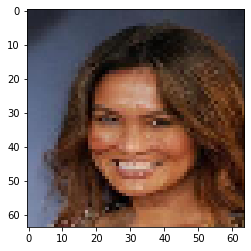

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
# predicting images
path = "../input/gender-recognition-200k-images-celeba/Dataset/Test/Female/160011.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)

[1.]
is a man


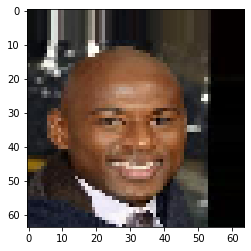

In [11]:
path = "../input/gender-recognition-200k-images-celeba/Dataset/Test/Male/160008.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)

In [16]:
(eval_loss,eval_accuracy) = model.evaluate(validation_generator,batch_size=256,verbose=1)

89/89 [==============================] - 85s 949ms/step - loss: 0.2369 - accuracy: 0.9018
